# Covid-19 Vaccine Allocations and Case Counts Analysis
----

Written in the Python 3.7.9 Environment

By Tarak Patel, Nicole Lund and Anne Niemiec.

Common Jupyter cells have been notated for ease of merging after individuals their analysis.

Individual working files will be merged using https://pypi.org/project/nbmerge/

In [89]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load Dependencies

# Data Organization & Collection
import pandas as pd
import requests
import json
from census import Census

# Data Visualization & Analysis
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import gmaps

# General Navigation
import time
import os
import sys

In [90]:
# Define users api key file folder location
api_key_path = r"C:\Users\nlund\Documents\GitHub\untracked_files"

In [91]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Add API key file to system path
sys.path.append(api_key_path)

# Import Census API Key
from untracked_api_keys import census_key
c = Census(census_key, year=2019)

# Import Google API key
from untracked_api_keys import g_key

In [92]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Case and Death Counts by state and time
    # This data combines:
        # United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
        # state_code.csv

c_d_withstate_df_path = r"..\data_manipulation\clean_data\c_d_withstate_df.csv"
cases_deaths_df = pd.read_csv(c_d_withstate_df_path)
cases_deaths_df.head()

,state_name,state_code,date,day_num,total_cases,confirmed_cases,probable_cases,new_cases,pnew_cases,total_deaths,confirmed_deaths,probable_deaths,new_deaths,pnew_deaths,consent_cases,consent_deaths,created_at
0,Alaska,AK,12/14/2020,0,40160,0.0,0.0,422,0.0,175,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
1,Alabama,AL,12/14/2020,0,297895,244762.0,53133.0,2264,332.0,4102,3624.0,478.0,0,0.0,Agree,Agree,12/15/2020 14:39
2,Arkansas,AR,12/14/2020,0,187057,0.0,0.0,1355,122.0,2990,0.0,0.0,45,22.0,Not agree,Not agree,12/15/2020 14:39
3,American Samoa,AS,12/14/2020,0,3,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
4,Arizona,AZ,12/14/2020,0,420248,404294.0,15954.0,11806,503.0,7358,6782.0,576.0,1,-2.0,Agree,Agree,12/15/2020 14:39


In [93]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Vaccination Allocation Data by state and time
    # This data combines:
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv

Combined_Vaccine_df_path = r"..\data_manipulation\clean_data\Combined_Vaccine_df.csv"
vaccine_allocation_df = pd.read_csv(Combined_Vaccine_df_path)
vaccine_allocation_df.head()

,state_name,state_code,date,day_num,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1
0,Connecticut,CT,04/19/2021,126,54990,54990,40400.0,40400.0,0.0
1,Maine,ME,04/19/2021,126,21060,21060,15400.0,15400.0,0.0
2,Massachusetts,MA,04/19/2021,126,105300,105300,77700.0,77700.0,0.0
3,New Hampshire,NH,04/19/2021,126,21060,21060,15500.0,15500.0,0.0
4,Rhode Island,RI,04/19/2021,126,16380,16380,12100.0,12100.0,0.0


In [94]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for State Population from Census reports
    # This data collects census API request data by state:
        # Population.csv

Population_path = r"..\data_manipulation\clean_data\Population.csv"
census_df = pd.read_csv(Population_path)
census_df.head()

,state_name,state_code,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate
0,Alabama,AL,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946
1,Alaska,AK,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114
2,Arizona,AZ,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676
3,Arkansas,AR,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,70481.0,2.349860
4,California,CA,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,1199233.0,3.052765


In [95]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Daily Vaccination Administered Data by state
Vaccine_admin_path = r"..\data_manipulation\clean_data\Vaccines_Administered_df.csv"
vaccine_admin_df = pd.read_csv(Vaccine_admin_path)
vaccine_admin_df

,state_name,state_code,date,day_num,daily_vaccinations
0,Alabama,AL,1/13/2021,30,5906
1,Alabama,AL,1/14/2021,31,7083
2,Alabama,AL,1/15/2021,32,7478
3,Alabama,AL,1/16/2021,33,7498
4,Alabama,AL,1/17/2021,34,7509
...,...,...,...,...,...
6395,Wyoming,WY,4/18/2021,125,1857
6396,Wyoming,WY,4/19/2021,126,1884
6397,Wyoming,WY,4/20/2021,127,2657
6398,Wyoming,WY,4/21/2021,128,2260


# Group 3 Analysis

#### Line Plot showing Cumulative National Vaccine Allocations and Reported deaths by date

* x-axis = Date

* Left y-axis = Total vaccine doses allocated cumulative across states
    * Note, reported weekly 

* Right y-axis = New deaths reported cumulative across states
    * Note, reported daily

* Example report with separate plots: https://www.cnbc.com/2021/04/09/covid-19-cases-deaths-vaccinations-daily-update.html

In [96]:
# Collect summary data
distribution_totals_s = vaccine_allocation_df.groupby(['day_num']).sum().sum(axis=1).cumsum()
# print(distribution_totals_s.head(3))

us_vaccination_totals_s = vaccine_admin_df.groupby(['day_num']).sum().cumsum()
# print(us_vaccination_totals_s.head(3))

us_cases_deaths_df = cases_deaths_df.groupby(['day_num']).sum()
# print(us_cases_deaths_df.head(3))

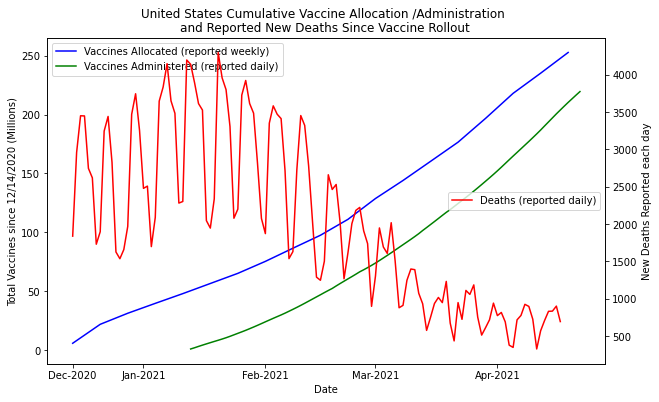

In [97]:
# Plot the data
fig_3a = plt.figure(figsize=(10,6))

# Plot on left axis
ax_3a_L = fig_3a.subplots()

ax_3a_L.plot(distribution_totals_s.index,distribution_totals_s.values/1000000,c='b')
ax_3a_L.plot(us_vaccination_totals_s.index,us_vaccination_totals_s.values/1000000,c='g')

ax_3a_L.set_ylabel('Total Vaccines since 12/14/2020 (Millions)')
ax_3a_L.legend(['Vaccines Allocated (reported weekly)','Vaccines Administered (reported daily)'],loc='upper left')

# Plot on left axis
ax_3a_R = ax_3a_L.twinx()

ax_3a_R.plot(us_cases_deaths_df.index,us_cases_deaths_df['new_deaths'],c='r')

ax_3a_R.set_ylabel('New Deaths Reported each day')
ax_3a_R.legend(['Deaths (reported daily)'],loc='center right')

# Annotate plot
ax_3a_R.set_title('United States Cumulative Vaccine Allocation /Administration  \nand Reported New Deaths Since Vaccine Rollout ')
ax_3a_L.set_xlabel('Date')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')

plt.savefig("US_vac_alloc_admin_deaths_daily.png",facecolor='w')

plt.show()

#### Line Plot showing Cumulative National Vaccine Allocations and Reported deaths by week

* x-axis = Date (weekly on Mondays)

* Left y-axis = Total vaccine doses allocated cumulative across states

* Right y-axis = New deaths reported cumulative across states

In [98]:
# Collect collect death data into weekly totals
day_num_daily = us_cases_deaths_df.index.tolist()
new_deaths_daily = us_cases_deaths_df['new_deaths'].tolist()

day_num_weekly = []
new_deaths_weekly = []
death_sum = 0
for day, deaths in zip(day_num_daily,new_deaths_daily):
    if day in distribution_totals_s.index:
        day_num_weekly.append(day)
        new_deaths_weekly.append(death_sum)
        death_sum = deaths
    else:
        death_sum += deaths

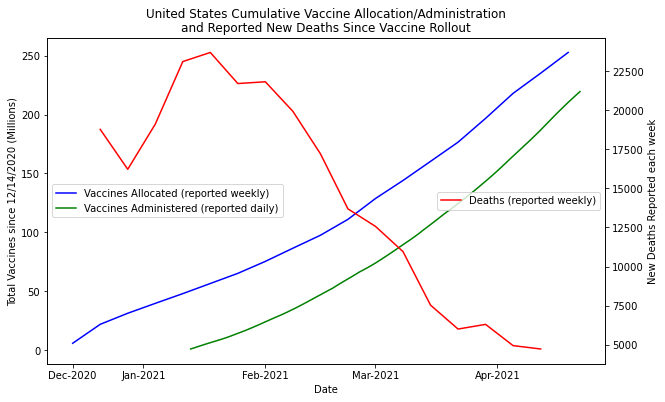

In [99]:
# Plot the data
fig_3b = plt.figure(figsize=(10,6))

# Plot on left axis
ax_3b_L = fig_3b.subplots()

ax_3b_L.plot(distribution_totals_s.index,distribution_totals_s.values/1000000,c='b')
ax_3b_L.plot(us_vaccination_totals_s.index,us_vaccination_totals_s.values/1000000,c='g')

ax_3b_L.set_ylabel('Total Vaccines since 12/14/2020 (Millions)')
ax_3b_L.legend(['Vaccines Allocated (reported weekly)','Vaccines Administered (reported daily)'],loc='center left')

# Plot on left axis
ax_3b_R = ax_3b_L.twinx()

ax_3b_R.plot(day_num_weekly[1:],new_deaths_weekly[1:],c='r')

ax_3b_R.set_ylabel('New Deaths Reported each week')
ax_3b_R.legend(['Deaths (reported weekly)'],loc='center right')

# Annotate plot
ax_3b_L.set_xlabel('Date')
ax_3b_L.set_title('United States Cumulative Vaccine Allocation/Administration\nand Reported New Deaths Since Vaccine Rollout')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')

plt.savefig("US_vac_alloc_admin_deaths_weekly.png",facecolor='w')
plt.show()

#### Line Plot showing Cumulative National Vaccine Regimens and Reported deaths by date

* x-axis = Date (weekly on Mondays)

* Left y-axis = Total vaccine regimens allocated
    * Note, cumulative across states

* Right y-axis = New deaths reported weekly

In [100]:
# Collect summary data for full treatment regimens 
distribution_totals_df = vaccine_allocation_df.groupby(['day_num']).sum()

pfe_regimens = distribution_totals_df[['pfe_dose_1','pfe_dose_2']].sum(axis=1)/2
mrna_regimens = distribution_totals_df[['mrna_dose_1','mrna_dose_2']].sum(axis=1)/2
jnj_regimens = distribution_totals_df[['jnj_dose_1']]

total_regimens = pd.concat([pfe_regimens,mrna_regimens,jnj_regimens],axis=1).sum(axis=1).cumsum()
total_regimens.head(3)

day_num
0      2962050.0
7     11003225.0
14    15693750.0
dtype: float64

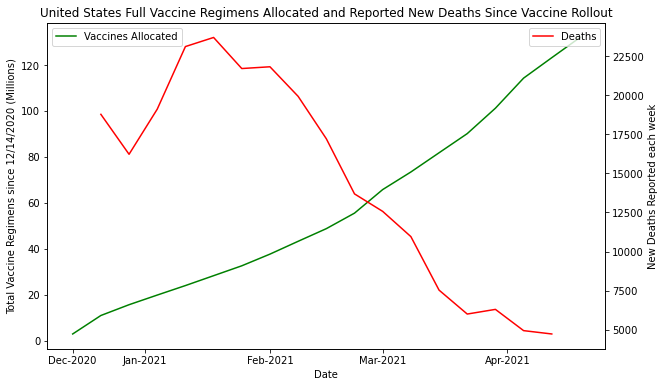

In [101]:
# Plot the data
fig_3c = plt.figure(figsize=(10,6))

# Plot left axis
fig_3c_L = fig_3c.subplots()

fig_3c_L.plot(total_regimens.index,total_regimens.values/1000000,c='g')

fig_3c_L.set_ylabel('Total Vaccine Regimens since 12/14/2020 (Millions)')

fig_3c_L.set_xlabel('Date')

fig_3c_L.set_title('United States Full Vaccine Regimens Allocated and Reported New Deaths Since Vaccine Rollout')

fig_3c_L.legend(['Vaccines Allocated'],loc='upper left')

# Plot right axis
fig_3c_R = fig_3c_L.twinx()
fig_3c_R.plot(day_num_weekly[1:],new_deaths_weekly[1:],c='r')
fig_3c_R.set_ylabel('New Deaths Reported each week')
plt.legend(['Deaths'],loc='upper right')

plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')

plt.savefig("US_regimens_alloc_deaths_weekly.png",facecolor='w')
plt.show()

#### Scatter Plot showing Reported Covid-19 Case Rate vs Poverty Rate by State

* x-axis = Poverty Rate (Percentage)

* y-axis = Reported Covid-19 Case Count / Population (Percentage)

* Include regression analysis

In [102]:
# Collect summary data of last reported data
last_cases_deaths_df = cases_deaths_df.loc[cases_deaths_df.groupby('state_name').day_num.idxmax()]
reported_cases_deaths_df = last_cases_deaths_df.groupby('state_code').sum()

cases_poverty_df = census_df.merge(reported_cases_deaths_df,on='state_code',how='left')
cases_poverty_df['case_rate'] = 100*cases_poverty_df['total_cases']/cases_poverty_df['population']
cases_poverty_df['death_rate'] = 100*cases_poverty_df['total_deaths']/cases_poverty_df['population']
cases_poverty_df.head(3)

,state_name,state_code,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate,...,probable_cases,new_cases,pnew_cases,total_deaths,confirmed_deaths,probable_deaths,new_deaths,pnew_deaths,case_rate,death_rate
0,Alabama,AL,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946,...,116939.0,508,208.0,10790,8498.0,2292.0,51,9.0,10.707634,0.221277
1,Alaska,AK,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114,...,0.0,0,0.0,329,0.0,0.0,0,0.0,8.580619,0.044636
2,Arizona,AZ,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676,...,61524.0,480,114.0,17151,15229.0,1922.0,-2,-9.0,12.099487,0.243266


In [103]:
# Restrict to states only: remove DC, PR
state_cases_poverty_df = cases_poverty_df.loc[
    (cases_poverty_df['state_code'] != "DC") &
    (cases_poverty_df['state_code'] != "PR")]
state_cases_poverty_df.head()

,state_name,state_code,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate,...,probable_cases,new_cases,pnew_cases,total_deaths,confirmed_deaths,probable_deaths,new_deaths,pnew_deaths,case_rate,death_rate
0,Alabama,AL,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946,...,116939.0,508,208.0,10790,8498.0,2292.0,51,9.0,10.707634,0.221277
1,Alaska,AK,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114,...,0.0,0,0.0,329,0.0,0.0,0,0.0,8.580619,0.044636
2,Arizona,AZ,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676,...,61524.0,480,114.0,17151,15229.0,1922.0,-2,-9.0,12.099487,0.243266
3,Arkansas,AR,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,70481.0,2.349860,...,0.0,221,60.0,5693,0.0,0.0,1,1.0,11.115901,0.189807
4,California,CA,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,1199233.0,3.052765,...,0.0,2763,0.0,59690,0.0,0.0,103,0.0,9.200077,0.151947


In [104]:
# Regression analysis
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(state_cases_poverty_df.poverty_rate,state_cases_poverty_df.case_rate)
y_regress = state_cases_poverty_df.poverty_rate * slope + intercept
line_text = f"y={str(round(slope,2))}x + {str(round(intercept,2))}, r-value is: {str(round(rvalue ** 2,4))}"

The r-value is: 0.057277908299769933


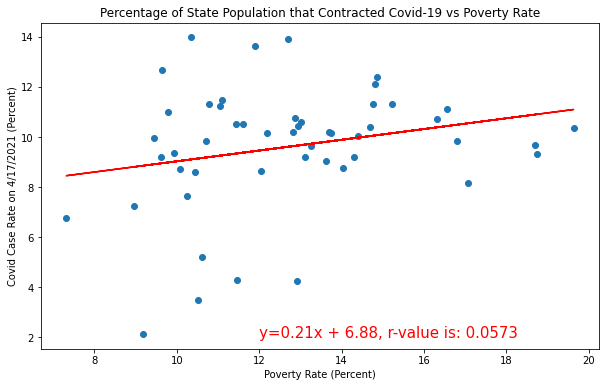

In [105]:
print(f"The r-value is: {rvalue ** 2}")

# Plot the data
fig_3d = plt.figure(figsize=(10,6))
ax_3d = fig_3d.subplots()

# Scatter plot
ax_3d.scatter(state_cases_poverty_df.poverty_rate,state_cases_poverty_df.case_rate)

# Regression line
ax_3d.plot(state_cases_poverty_df.poverty_rate,y_regress,"r-")
ax_3d.annotate(line_text,(12,2),fontsize=15,color="red")

# Annotate plot
ax_3d.set_xlabel('Poverty Rate (Percent)')
ax_3d.set_ylabel('Covid Case Rate on 4/17/2021 (Percent)')
ax_3d.set_title('Percentage of State Population that Contracted Covid-19 vs Poverty Rate')

plt.savefig("state_cases_poverty.png",facecolor='w')
plt.show()

#### Scatter Plot showing Reported Covid-19 Death Rate vs Poverty Rate by State

* x-axis = Poverty Rate (Percentage)

* y-axis = Reported Covid-19 Death Count / Population (Percentage)

* Include regression analysis

In [106]:
# Regression analysis
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(state_cases_poverty_df.poverty_rate,state_cases_poverty_df.death_rate)
y_regress2 = state_cases_poverty_df.poverty_rate * slope2 + intercept2
line_text2 = f"y={str(round(slope2,2))}x + {str(round(intercept2,2))}, r-value is: {str(round(rvalue2 ** 2,4))}"

The r-value is: 0.1527784830609351


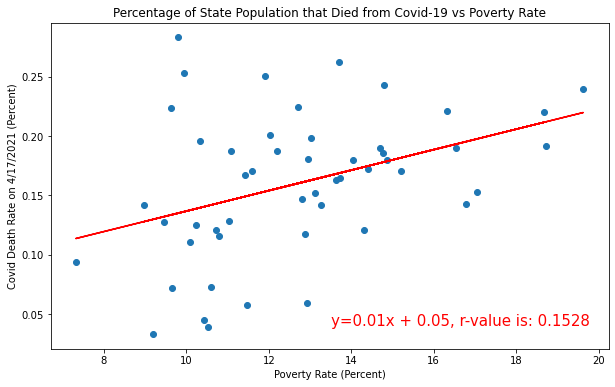

In [107]:
print(f"The r-value is: {rvalue2 ** 2}")

# Plot the data
fig_3e = plt.figure(figsize=(10,6))
ax_3e = fig_3e.subplots()

# Scatter plot
ax_3e.scatter(state_cases_poverty_df.poverty_rate,state_cases_poverty_df.death_rate)

# Regression line
ax_3e.plot(state_cases_poverty_df.poverty_rate,y_regress2,"r-")
ax_3e.annotate(line_text2,(13.5,0.04),fontsize=15,color="red")

# Annotate plot
ax_3e.set_xlabel('Poverty Rate (Percent)')
ax_3e.set_ylabel('Covid Death Rate on 4/17/2021 (Percent)')
ax_3e.set_title('Percentage of State Population that Died from Covid-19 vs Poverty Rate')

plt.savefig("state_deaths_poverty.png",facecolor='w')
plt.show()

#### Line Plot showing Cumulative Arizona Vaccine Allocations and Reported deaths by week

* x-axis = Date (weekly on Mondays)

* Left y-axis = Total vaccine doses allocated to Arizona

* Right y-axis = New deaths reported in Arizona

In [108]:
# Collect summary data
az_vaccine_allocation_df = vaccine_allocation_df.loc[vaccine_allocation_df['state_code'] == 'AZ']
az_distribution_totals_s = az_vaccine_allocation_df.groupby(['day_num']).sum().sum(axis=1).cumsum()
# print(az_distribution_totals_s.head(3))

az_vaccine_admin_df = vaccine_admin_df.loc[vaccine_admin_df['state_code'] == 'AZ']
az_vaccination_totals_s = az_vaccine_admin_df.groupby(['day_num']).sum().cumsum()
# print(az_vaccination_totals_s.head(3))

azonly_cases_deaths_df = cases_deaths_df.loc[cases_deaths_df['state_code'] == 'AZ']
az_cases_deaths_df = azonly_cases_deaths_df.groupby(['day_num']).sum()
# print(az_cases_deaths_df.new_deaths)

In [109]:
# Collect collect death data into weekly totals
az_day_num_daily = az_cases_deaths_df.index.tolist()
az_new_deaths_daily = az_cases_deaths_df['new_deaths'].tolist()
# print(az_day_num_daily, az_new_deaths_daily)

az_day_num_weekly = []
az_new_deaths_weekly = []
az_death_sum = 0
for day, deaths in zip(az_day_num_daily,az_new_deaths_daily):
    if day in az_distribution_totals_s.index:
        az_day_num_weekly.append(day)
        az_new_deaths_weekly.append(az_death_sum)
        az_death_sum = deaths
        # print(az_death_sum)
    else:
        az_death_sum += deaths
        # print(az_death_sum)

# print(az_day_num_weekly, az_new_deaths_weekly)

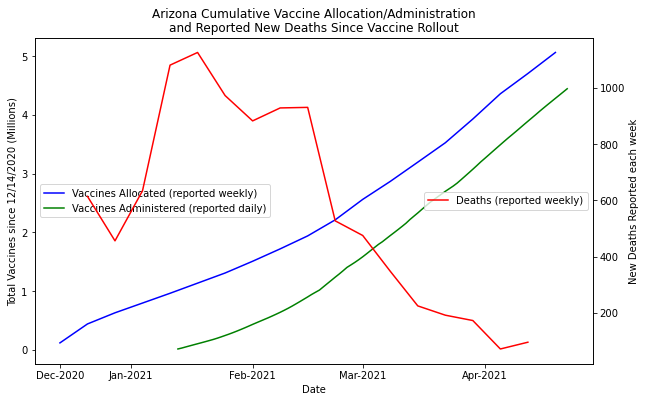

In [110]:
# Plot the data
fig_3f = plt.figure(figsize=(10,6))

# Plot on left axis
ax_3f_L = fig_3f.subplots()

ax_3f_L.plot(az_distribution_totals_s.index,az_distribution_totals_s.values/1000000,c='b')
ax_3f_L.plot(az_vaccination_totals_s.index,az_vaccination_totals_s.values/1000000,c='g')

ax_3f_L.set_ylabel('Total Vaccines since 12/14/2020 (Millions)')
ax_3f_L.legend(['Vaccines Allocated (reported weekly)','Vaccines Administered (reported daily)'],loc='center left')

# Plot on left axis
ax_3f_R = ax_3f_L.twinx()

ax_3f_R.plot(az_day_num_weekly[1:],az_new_deaths_weekly[1:],c='r')

ax_3f_R.set_ylabel('New Deaths Reported each week')
ax_3f_R.legend(['Deaths (reported weekly)'],loc='center right')

# Annotate plot
ax_3f_L.set_xlabel('Date')
ax_3f_L.set_title('Arizona Cumulative Vaccine Allocation/Administration\nand Reported New Deaths Since Vaccine Rollout')
plt.xticks([0, 18, 49, 77, 108], ['Dec-2020', 'Jan-2021', 'Feb-2021', 'Mar-2021', 'Apr-2021'], rotation='horizontal')

plt.savefig("AZ_vac_alloc_admin_deaths_weekly.png",facecolor='w')
plt.show()